In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Exploratory Data Analysis



O objetivo da análise exploratória de dados (*Exploratory Data Analysis* - EDA) é conhecer os dados. Isto nos ajuda a:

- *conhecer a natureza dos dados*:
    - Importante para construir teses de extração de valor a partir destes: o que será que podemos obter destes dados para trazer mais valor ao nosso negócio?
    - Descobrir anomalias nos dados originais:
        - dados faltantes;
        - *outliers*: dados raros porém legítimos;
        - *erros e inconsistências de formatação*: dados registrados de forma errônea ou com formatos inconsistentes (e.g. datas em formatos diferentes ao longo do conjunto de dados)
- *formular teses*:
    - construir e validar mecanismos explicativos para a criação dos dados;
- *construir modelos*:
    - Modelos explicativos: 
        - baseados em formulação de teses explicativas, e geralmente são chamados de *interpretáveis*, pois seus parâmetros correspondem a idéias da tese explicativa. 
        - Por exemplo: criar um modelo linear baseado na tese de que a variável dependente se relaciona linearmente com as variáveis independentes, a menos de um ruído independente e de média zero. 
        - Os parâmetros deste modelo são comumente associados a fenômenos físicos/econômicos/biológicos/sociológicos, etc..
        - Um dos objetivos centrais da *Estatística*
    - Modelos preditivos não-interpretáveis: 
        - Também chamados de modelos *caixa-preta*, não permitem uma análise que associe seus parâmetros internos a alguma tese simples de funcionamento dos dados. 
        - Geralmente são modelos com maior capacidade preditiva (mas nem sempre). 
        - Este é um dos pontos centrais do *Machine Learning*. 

# Um projeto de *machine learning*

Vamos realizar a análise exploratória de dados do projeto "Car Prices".

In [2]:
from dotenv import dotenv_values

config = dotenv_values()
DATA_DIR = config['DATA_DIR']

In [3]:
from car_prices.dataset import load_car_dataset

data = load_car_dataset(DATA_DIR)

Vamos ver se a leitura de dados funcionou:

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         10000 non-null  object 
 1   Model         10000 non-null  object 
 2   Year          10000 non-null  int64  
 3   Engine_Size   10000 non-null  float64
 4   Fuel_Type     10000 non-null  object 
 5   Transmission  10000 non-null  object 
 6   Mileage       10000 non-null  int64  
 7   Doors         10000 non-null  int64  
 8   Owner_Count   10000 non-null  int64  
 9   Price         10000 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 781.4+ KB


In [5]:
data.head(5)

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867


### Entendimento do negócio

Esses dados representam informações acerca de veículos usados à venda.

***

***Atividade***

Escreva uma tabela com:

- o nome de cada coluna;
- seu significado;
- tipo: inteira, real ou categórica;
- unidade de medida.

Note que uma variável como `Mileage`, apesar de ser inteira, realmente representa um valor real.

***

***Resposta***

| Nome da coluna | Significado           | Tipo       | Unidade de medida |
|----------------|-----------------------|------------|-------------------|
| Brand          | marca                 | categórica | n/a               |
| Model          | modelo                | categórica | n/a               |
| Year           | ano                   | inteira    | anos              |
| Engine_Size    | cilindrada            | real       | litros            |
| Fuel_Type      | combustível           | categórica | n/a               |
| Transmission   | câmbio                | categórica | n/a               |
| Mileage        | kilometragem          | real       | kilometros        |
| Doors          | número de portas      | inteira    | contagem          |
| Owner_Count    | quantos donos já teve | inteira    | contagem          |
| Price          | preço de venda        | real       | USD               |

***

***Atividade***

Escreva o objetivo de negócios deste projeto.

***

***Resposta***

Prever o preço de venda de um veículo usado baseado em sua marca, modelo, ano, características do veículo (cilindrada, combustível, câmbio, portas) e histórico do veículo (kilometragem rodada, número de antigos donos).

### Análise exploratória

O objetivo da análise exploratória é "conhecer" os dados:

- Qual a distribuição de cada *feature*?

- Qual a natureza de cada *feature*?

    - Unidade de medida

    - Se é estritamente positiva ou se pode ser positiva ou negativa

    - Para que serve?

- Quais e como são as distribuições conjuntas de *features*? Em particular, como as *features* se relacionam com o *target*?

- Existem anomalias e erros?

    - Dados faltantes

    - "Saturação" de dados

    - Outliers

    - Desbalanceamento de classes

    - Dados duplicados

#### Análise exploratória: antes ou depois da separação treino-teste?

Durante o processo de modelagem vamos dividir os dados em dois conjuntos: "dados de treino" e "dados de teste". Devemos treinar nossos modelos com o conjunto de dados de treino, e avaliar seu desempenho no conjunto de teste, para que não nos enganemos com desempenhos preditivos excelentes no conjunto de treino e que não se reproduzem no conjunto de teste!

***

***Atividade***

Como se chama o fenômeno no qual temos um excelente desempenho no conjunto de treino e um desempenho bem menor no conjunto de teste?

***

***Resposta***

<center>
<span style="color:red;font-family:Papyrus;font-weight:bold;font-size:30px">
    OVERFITTING!
</span>
<span style="color:darkgray;font-size:10px">
    booooooo!
</span>
</center>

Quando devemos fazer a análise exploratória?

- Antes da separação treino-teste, ou seja, no conjunto de dados completo?

- Depois da separação treino-teste, ou seja, usando apenas o conjunto de dados de treino?

Esta é uma pergunta difícil de responder.

- Analisar antes da separação:

    - Vantagens: todo o conjunto de dados de exemplo que foi coletado está á nossa disposição para estudo, o que torna mais fácil a detecção de anomalias raras, como outliers ou a ocorrência de categorias raras em *features* categóricas.

    - Desvantagens: corremos o risco de "data snooping" ("bisbilhotar" os dados), onde acabamos por aprender algo sobre os dados que pode impactar de modo "injusto" nossa modelagem - é como se estivéssemos "overfittando" sem querer!

- Analisar depois da separação:

    - Vantagens: reduz o risco de "data snooping"

    - Desvantagens: podemos não perceber anomalias e erros raros nos dados, que podem impactar nossa modelagem de uma forma que é difícil de identificar.

O que fazer então? Em geral, queremos balancear o risco de "data snooping" com o risco de não entender os detalhes mais finos e raros dos dados. Portando a recomendação é fazer análises exploratórias antes e depois da separação, com objetivos diferentes:

- Análise exploratória antes da separação: faça apenas análises globais e simples, para checar a sanidade dos dados e realizar filtragens simples. Evite análises que conectem as *features* com o *target*.

- Análise exploratória depois da separação: você está livre para explorar o que quiser.

#### Análise exploratória preliminar


Nesta fase vamos conhecer a natureza dos dados sem explorar suas interrelações, em especial não vamos explorar a conexão entre as *features* e o *target*.

Vamos proceder da seguinte forma:

<table>

<tr>
<th> Etapa </th>
<th> Objetivos </th>
<th> Ferramentas </th>
</tr>

<tr>

<td>
    Uma análise global do volume de dados
</td>

<td>
    <ul>
    <li> Quais são as <em>features</em>?</li>
    <li> Quem é o <em>target</em>?</li>
    <li> Quais variáveis são contínuas e quais são categóricas?</li>
    <li> Existem dados faltantes? </li>
    <li> Existem dados duplicados? </li>
    </ul>
</td>

<td>
    <div>
    <ul>
    <li> Número de linhas e colunas </li>
    <li> Tipo de dados de cada coluna </li>
    <li> Remoção de linhas duplicadas <em>se isso realmente for um erro</em> </li>
    </ul>
    </div>
</td>
</tr>

<tr>

<td>
    Uma primeira análise da natureza das features
</td>

<td>
    <ul>
    <li> Qual a unidade de medida de cada variável? </li>
    <li> Existem anomalias? 
        <ul>
            <li> <em>outliers</em> </li>
            <li> erros grosseiros </li>
            <li> <em>spikes</em> </li>
        </ul>
    </li>
    <li> Para cada variável contínua
        <ul>
            <li> Simétrica? </li>
            <li> Estritamente positiva/negativa? </li>
            <li> Unimodal / multimodal? </li>
            <li> Cauda longa à direita/esquerda? </li>
        </ul>
    </li>
    <li> Para cada variável categórica
        <ul>
            <li>Categorias raras?</li>
            <li>Categorias dominantes?</li>
        </ul>
    </li>
    </ul>
</td>

<td>
    <ul>
    <li>Medidas descritivas de posição e espalhamento</li>
    <li>Histogramas</li>
    <li>Tabelas de frequência</li>
    <li>Gráficos de barra</li>
    </ul>
</td>

</tr>

</table>

##### Análise global

Novamente, vamos conferir os tipos de dados espiando as primeiras linhas do *dataset*:

In [6]:
data.head(n=5)

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867


E vamos verificar quantos exemplos temos, e qual o tipo de dados identificado pelo Pandas para cada coluna:

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         10000 non-null  object 
 1   Model         10000 non-null  object 
 2   Year          10000 non-null  int64  
 3   Engine_Size   10000 non-null  float64
 4   Fuel_Type     10000 non-null  object 
 5   Transmission  10000 non-null  object 
 6   Mileage       10000 non-null  int64  
 7   Doors         10000 non-null  int64  
 8   Owner_Count   10000 non-null  int64  
 9   Price         10000 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 781.4+ KB


***

***Atividade***

Crie três listas de nomes de colunas:

- `real_columns` contendo as colunas numéricas de valores reais;
- `int_columns` contendo as colunas numéricas de valores inteiros;
- `cat_columns` contendo as colunas categóricas.

***

***Resposta***

In [8]:
real_columns = [
    'Engine_Size',
    'Mileage',
    'Price',
]

int_columns = [
    'Year',
    'Doors',
    'Owner_Count',
]

cat_columns = [
    'Brand',
    'Model',
    'Fuel_Type',
    'Transmission',
]

***

***Atividade***

Construa estatísticas descritivas de cada coluna usando o método `.describe()` do DataFrame `data`.

Dica: aborde separadamente as `real_columns`, `int_columns` e `cat_columns`.

***

***Resposta***

In [9]:
data[real_columns].describe()

,Engine_Size,Mileage,Price
count,10000.000000,10000.000000,10000.00000
mean,3.000560,149239.111800,8852.96440
std,1.149324,86322.348957,3112.59681
min,1.000000,25.000000,2000.00000
25%,2.000000,74649.250000,6646.00000
50%,3.000000,149587.000000,8858.50000
75%,4.000000,223577.500000,11086.50000
max,5.000000,299947.000000,18301.00000


In [10]:
data[int_columns].describe()

,Year,Doors,Owner_Count
count,10000.000000,10000.000000,10000.000000
mean,2011.543700,3.497100,2.991100
std,6.897699,1.110097,1.422682
min,2000.000000,2.000000,1.000000
25%,2006.000000,3.000000,2.000000
50%,2012.000000,3.000000,3.000000
75%,2017.000000,4.000000,4.000000
max,2023.000000,5.000000,5.000000


In [11]:
data[cat_columns].describe()

,Brand,Model,Fuel_Type,Transmission
count,10000,10000,10000,10000
unique,10,30,4,3
top,Ford,Accord,Electric,Manual
freq,1048,365,2625,3372


***

***Atividade***

Para as variáveis reais, construa seus histogramas e faça uma análise.

***

***Resposta***

In [12]:
def get_num_rows(num_graphs: int, num_cols: int) -> int:
    '''
    Retorna o número de linhas necessárias para exibir num_graphs gráficos
    em num_cols colunas.

    Args:
        num_graphs: int
            Número de gráficos a serem exibidos. Deve ser maior que 0.
        
        num_cols: int
            Número de colunas a serem exibidas. Deve ser maior que 0.

    Returns: int
        Número de linhas necessárias para exibir num_graphs gráficos em
        num_cols colunas.

    Exemplo:
        get_num_rows(5, 2) == 3
        get_num_rows(5, 3) == 2
        get_num_rows(5, 5) == 1
        get_num_rows(5, 6) == 1

    Para entender este código, veja a explicação no material extra.
    '''
    return (num_graphs - 1) // num_cols + 1

In [13]:
def plot_histograms_real_variables(data: pd.DataFrame, n_cols=2) -> None:
    ''' 
    Plota histogramas para as variáveis reais do dataset: 
    Engine_Size, Mileage e Price.
    '''
    # Create all subplots.
    n_graphs = 3
    n_rows = get_num_rows(n_graphs, n_cols)

    inches_per_col = 6
    inches_per_row = 4

    width = n_cols * inches_per_col
    height = n_rows * inches_per_row

    fig, axes = plt.subplots(
        nrows=n_rows,
        ncols=n_cols,
        figsize=(width, height),
    )
    axes = axes.flatten()

    unused_axes = n_rows * n_cols - n_graphs
    for i in range(unused_axes):
        fig.delaxes(axes[-1 - i])

    # Plot engine size histogram.
    start = 1.0
    end = 5.0
    inc = 0.1
    bins = np.arange(start, end + inc, inc)

    ax = axes[0]
    ax.hist(data['Engine_Size'], bins=bins, density=True)
    ax.set_title('Engine_Size')
    ax.set_xlabel('Engine_Size [L]')
    ax.set_ylabel('Frequencia normalizada')

    # Plot mileage histogram.
    num_bins = int(np.ceil(np.sqrt(data.shape[0]))) // 2

    ax = axes[1]
    ax.hist(data['Mileage'], bins=num_bins, density=True)
    ax.set_title('Mileage')
    ax.set_xlabel('Mileage [km]')
    ax.set_ylabel('Frequencia normalizada')

    # Plot price histogram.
    num_bins = int(np.ceil(np.sqrt(data.shape[0]))) // 2

    ax = axes[2]
    ax.hist(data['Price'], bins=num_bins, density=True)
    ax.set_title('Price')
    ax.set_xlabel('Price [USD]')
    ax.set_ylabel('Frequencia normalizada')

    fig.tight_layout()

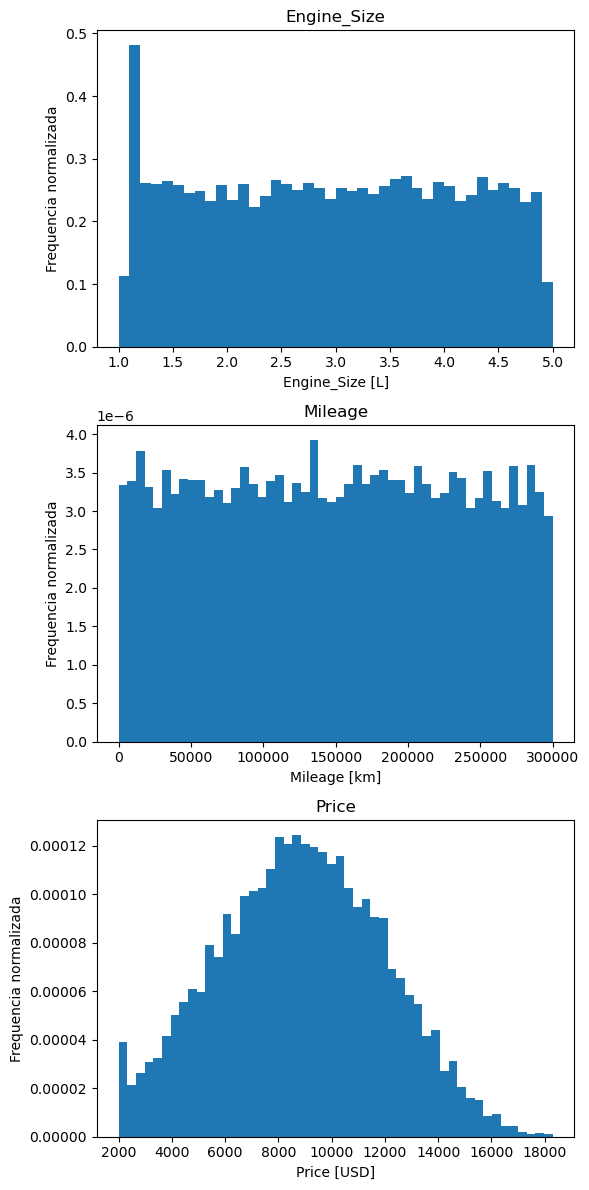

In [14]:
plot_histograms_real_variables(data, n_cols=1)

Com a exceção de um pequeno *spike* no início dos preços, e um excesso de veículos com motores de baixa cilindrada (que inclusive pode explicar o *spike* nos preços baixos), não temos anomalias.

***

***Atividade***

Para as variáveis inteiras, faça gráficos de barra de suas contagens e analise.

***

***Resposta***

In [15]:
def plot_bars_integer_variables(data: pd.DataFrame, n_cols=2) -> None:
    int_columns = [
        'Year',
        'Doors',
        'Owner_Count',
    ]

    # Create all subplots.
    n_graphs = len(int_columns)
    n_rows = get_num_rows(n_graphs, n_cols)

    inches_per_col = 6
    inches_per_row = 4

    width = n_cols * inches_per_col
    height = n_rows * inches_per_row

    fig, axes = plt.subplots(
        nrows=n_rows,
        ncols=n_cols,
        figsize=(width, height),
    )
    axes = axes.flatten()

    unused_axes = n_rows * n_cols - n_graphs
    for i in range(unused_axes):
        fig.delaxes(axes[-1 - i])

    # Plot all integer columns.
    for ax, column in zip(axes, int_columns):
        counts = data[column].value_counts().sort_index()
        ax.bar(counts.index, counts.values)
        ax.set_title(column)
        ax.set_xlabel(column)
        ax.set_ylabel('Frequencia')

    fig.tight_layout()

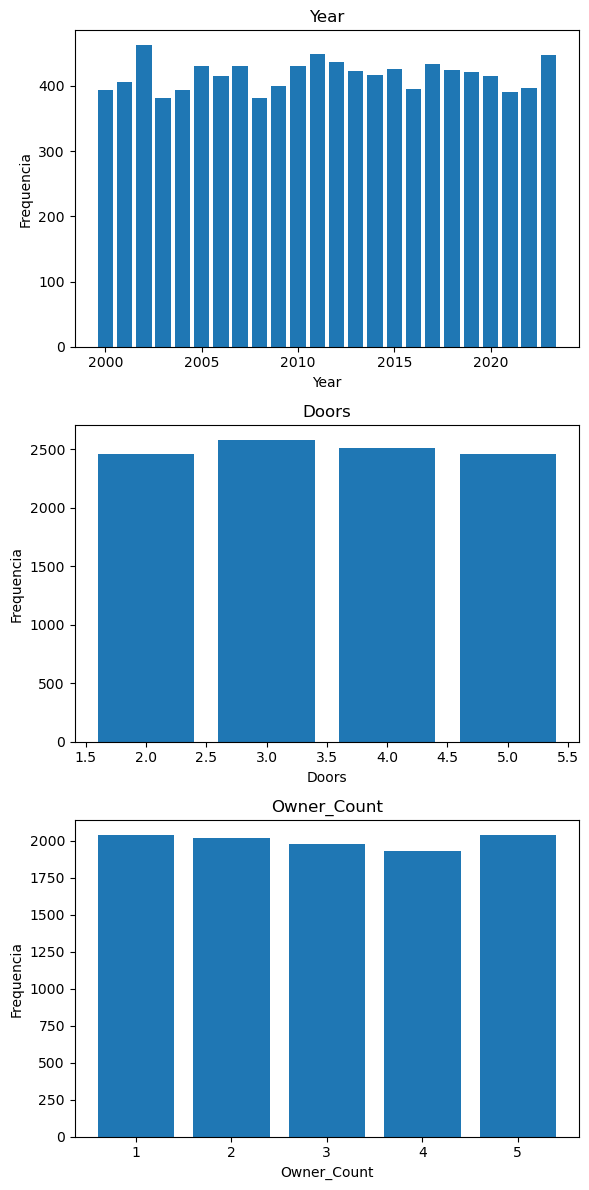

In [16]:
plot_bars_integer_variables(data, n_cols=1)

Aparentemente a amostra de carros é bem homogênea em relação ao ano de fabricação, número de portas e número de donos prévios.

***

***Atividade***

Construa gráficos de barras para as contagens das variáveis categóricas e analise.

***

***Resposta***

In [17]:
def plot_categorical_variable_bars(data: pd.DataFrame) -> None:
    ''' Plot count bars for all categorical variables in the dataset. '''
    figure_heights = {
        'Brand': 4,
        'Model': 8,
        'Fuel_Type': 3,
        'Transmission': 3,
    }

    width = 6

    for column, height in figure_heights.items():
        counts = data[column].value_counts().sort_values(ascending=True)
        plt.figure(figsize=(width, height))
        plt.barh(counts.index, counts.values)
        plt.title(column)
        plt.xlabel('Frequencia')
        plt.ylabel(column)
        plt.tight_layout()
        plt.show()


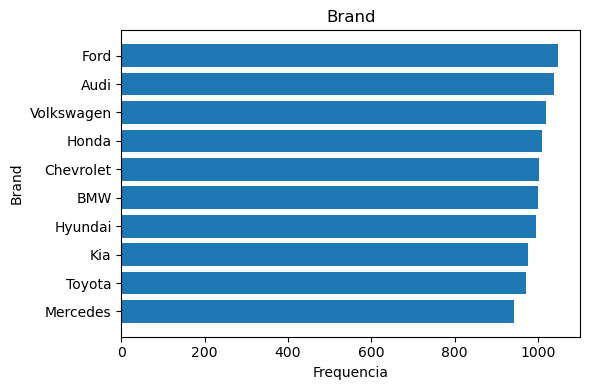

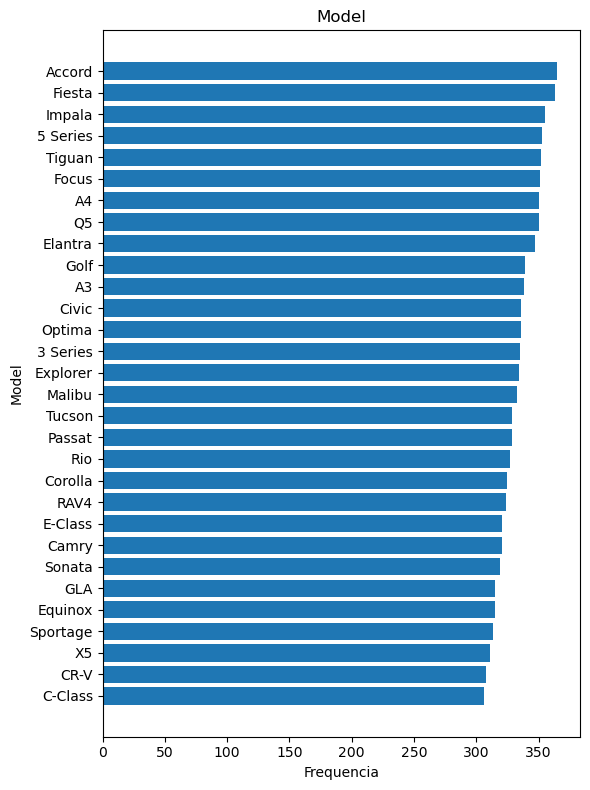

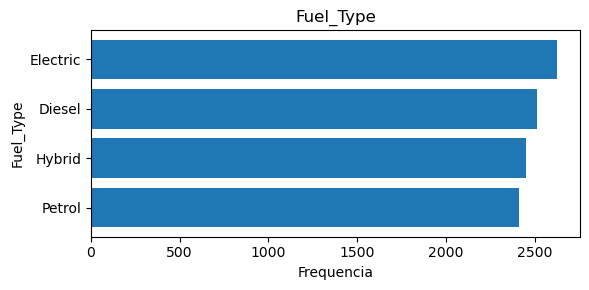

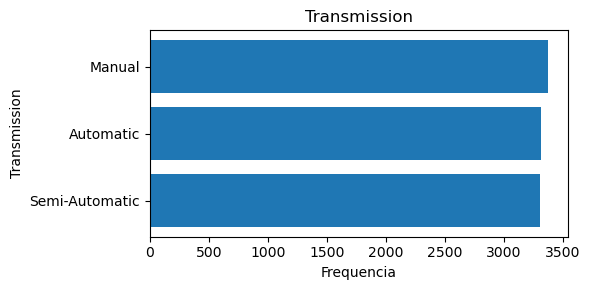

In [18]:
plot_categorical_variable_bars(data)

Novamente, sem anomalias e tudo surpreendentemente balanceado.